In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


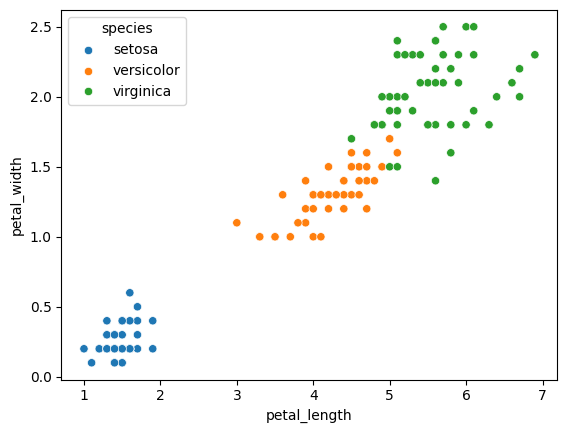

In [3]:
sns.scatterplot(data=df , x ='petal_length',y='petal_width',hue='species')
plt.show()

In [6]:
#Seperate feature and target
X = df.drop(columns='species',axis=1)
Y = df['species']

In [7]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
#Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [10]:
#split into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=2)

In [12]:
#KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [13]:
#predict
test_pred = knn.predict(X_test)

In [14]:
test_pred

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica'], dtype=object)

In [20]:
test_data_accuracy = accuracy_score(test_pred,Y_test)
test_data_accuracy

0.9666666666666667

In [24]:
test_data_precision = precision_score(test_pred,Y_test,average='macro')
test_data_precision

0.9583333333333334

In [25]:
test_data_recall = recall_score(test_pred,Y_test,average='macro')
test_data_recall

0.9629629629629629